# Redes Multicapa para Regresión

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions3 import *

In [3]:
# import data from csv
data = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/Student_Performance_DEV.csv').drop(columns='idx')
data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,6.326605,6.560017,5.043475,4.958906,4,False
1,7.774666,6.459315,3.529156,9.601236,5,False
2,7.343601,6.487913,2.500939,6.390868,4,False
3,1.851852,10.126572,2.311390,4.000000,5,False
4,3.607081,8.093355,3.419712,4.857238,9,False
...,...,...,...,...,...,...
1395,5.010497,6.481511,2.531747,4.598361,3,False
1396,6.280722,6.056482,5.997887,4.408789,8,False
1397,5.492269,5.402522,5.867482,4.000000,5,False
1398,7.002018,6.425094,5.027055,5.284618,6,False


### a)
Implementar una red neuronal multicapa, que funcione para cualquier valor $L \ge 1$, y $M^{(l)} \ge 1$, así como el algoritmo de optimización de descenso por gradiente y backpropagation para optimizar los pesos de las unidades ocultas, asumiendo una “loss-function” que sea la suma de los errores cuadráticos.

In [4]:
data = one_hot_encoding(data, 'extracurricular_activities')
train_data, test_data = train_test_split(data, test_size=0.2, seed=42)

X_train = train_data.drop(columns=['forecasted_performance'])
y_train = train_data['forecasted_performance'].values

X_test = test_data.drop(columns=['forecasted_performance'])
y_test = test_data['forecasted_performance'].values

X_train

,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities_False,extracurricular_activities_True
0,7.512345,5.072058,8.775325,14,0,1
1,7.645378,5.266626,8.351701,6,0,1
2,7.096499,3.071855,8.498025,2,0,1
3,6.454375,3.299192,9.913947,9,1,0
4,7.731830,2.091205,4.052463,17,1,0
...,...,...,...,...,...,...
1115,8.401831,5.314130,4.808138,16,1,0
1116,6.644282,4.947815,5.392057,2,1,0
1117,7.629650,4.989611,6.980204,9,1,0
1118,8.681235,5.776701,8.484583,9,1,0


In [21]:
nn = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 200, 1], activations=['relu', 'linear'], verbose=False)

# Fit the MLP model to the training data
train_losses, test_losses = nn.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=100, 
                                    mini_batch_size=10, 
                                    alpha=1e-5)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:08<00:00, 11.55it/s]


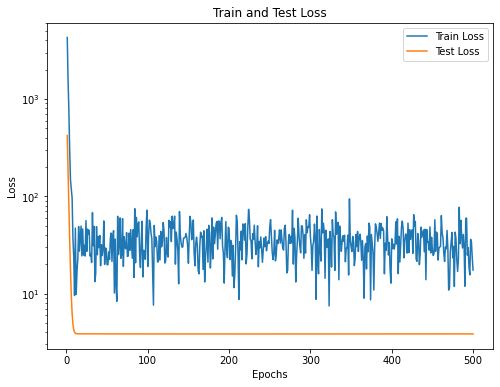

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

In [18]:
predictions = nn.predict(X_test, verbose=True)

print("  Predictions  |   Test")
for i in range(len(predictions)):
    print(predictions[i], y_test[i])


X.shape: (280, 6)
X: 
 [[ 8.55108677  5.28900346  6.47087856  8.          0.          1.        ]
 [ 7.40955901  2.19223162  5.83208764  4.          0.          1.        ]
 [ 6.28946919  3.25448845  4.          7.          1.          0.        ]
 ...
 [ 8.43320614  2.69401173  8.55926968 14.          0.          1.        ]
 [ 6.0495974   3.58273148  7.96523693  4.          0.          1.        ]
 [ 8.30749849  5.05960638  4.79239682 18.          1.          0.        ]]
  Predictions  |   Test
[6.57709642] 9.678152468405315
[6.57709642] 7.337679311836268
[6.57709642] 4.542551445452206
[6.57709642] 4.408466887658554
[6.57709642] 6.5918391130432274
[6.57709642] 7.126303113365252
[6.57709642] 5.824865318066567
[6.57709642] 4.318271770712224
[6.57709642] 2.6946935959490674
[6.57709642] 4.621360632505932
[6.57709642] 6.289601307408167
[6.57709642] 6.659869395546703
[6.57709642] 8.050121380949898
[6.57709642] 1.851851851851852
[6.57709642] 7.629186838253545
[6.57709642] 3.628587783482679

### b)
Implementar descenso por gradiente estocástico y graficar la evolución del error de entrenamiento en función de las  épocas.

### c)
Implementar descenso por gradiente con mini-baches, y graficar la evolución del error de entrenamiento en función de las épocas, para distintos tamaños de baches. Deberáas elegir a tu criterio el tamaño de los mini-batches.

### d)
Implementar descenso por gradiente con mini-baches, y graficar la evolución del error de entrenamiento en función de las épocas, para distintos tamaños de baches. Deberás elegir a tu criterio el tamaño de los mini-batches.

**Sugerencia:** si bien uno puede hacer una búsqueda exhaustiva sobre el espacio de hiperparámetros $L$ y $M^{(l)}$, esto puede resultar computacionalmente demasiado costoso, debido a que para cada combinación y cada fold, se de debe re-entrenar el modelo y evaluarlo. Piense si hay alguna manera de recorrer el espacio de búsqueda con menor costo computacional. Además, recuerde que dados dos modelos de performance similar, se privilegia elegir el de menor complejidad (menor cantidad de parámetros), porque tenderá a tener menor varianza en el error predictivo sobre data sets “nuevos” (es decir, que no hayan sido usados para el deasrrollo del modelo).


### e)
Analizar la performance de su modelo final en términos de $RMSE$, $MAE$ y $R^2$, y graficar $\hat{y}$ vs. $y$ sobre los datos “held out” de los folds de cross-validaion. Compare esto con la performance del modelo de regresión lineal desarrollado en el problema anterior. ¿Cuál de los dos modelos cree usted que generalizará mejor? ¿Por qué?
